# Colonial Water Birds Automated Report
In this code we will attempt to generate an automated report of the CWB dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Python function: cwb_report
cwb_report is a function that takes in a csv file, and generates a report of the desired format with the parameters you feed it.

In [39]:
'''
PARAMETERS:

df - Path of the data frame to read in. Must be a csv.

sites - Give a list of the sites you want to include.  Default all sites are included in the report.

site_nums - Give a list of the site numbers you want to include. Default all site numbers are included in the report.

site_types - Give a list of the sites types you want to include. Default all site types are included in the report.

birds - Give a lits of the birds you want to include. Default all birds are included in the report.

years - Give the start then end year to include. Default includes all years.

skip_years - An integer x. Includes every x years. Default includes all years.

row_start - Row in the CSV where the table begins. (Including the column names)

return_table - Returns the resulting table if True. Default True.

show_plots - Prints summary plots if True. Default False.

plot_all_sites - Prints plots of all sites if True. Default False.

plot_all_site_types - Prints plots of all site types if True. Default False.

combine_plots - Overlays all bird plots onto one plot for comparison. 
                Otherwise all plots will be specific to the species of bird.
                Default True.

remove_zeros - Removes observations where zero nests were counted. Default False.

group - Variables you want to group by. Default is none.
'''

def cwb_report(df, sites = [], site_nums = [], site_types = [], birds = [], 
               years = (0, 0), skip_years = 0, row_start = 6, 
               return_table = True, show_plots = False, plot_all_sites = False, 
               plot_all_site_types = False, combine_plots = True, remove_zeros = False, group = []):
    
    '''
    CLEANING / PRE-PROCESSING
    '''
    cwb = pd.read_csv(df, skiprows = row_start)
    cwb['Survey Date'] = pd.to_datetime(cwb['Survey Date'], format='%m/%d/%Y')
    cwb.drop('Unnamed: 8', axis = 1, inplace = True)
    cwb['Year'] = pd.DatetimeIndex(cwb['Survey Date']).year.fillna(0).astype(int)
    if remove_zeros:
        cwb['# Nests'] = cwb['# Nests'].fillna(0).astype(int)
        cwb = cwb[cwb['# Nests'] != 0]
    else:
        cwb['# Nests'] = cwb['# Nests'].fillna(0).astype(int)
    
    '''
    FILTERING 
    '''
    if years[1]: #Default we include all years
        if not skip_years: #If we are including all years in "years"
            cwb = cwb[cwb['Survey Date'].between(years[0], years[1])] #This is NOT inclusive
        else: 
            year_range = np.arange(int(years[0]), int(years[1]), skip_years) 
            cwb = cwb[cwb.Year.isin(year_range)]

    if len(sites):
        cwb = cwb[cwb['Site Name'].isin(sites)]
    
    if len(site_nums):
        cwb = cwb[cwb['Site Number '].isin(site_nums)]
    
    if len(site_types):
        cwb = cwb[cwb['Site Type*'].isin(site_types)]
            
    if len(birds):
        cwb = cwb[cwb.Species.isin(birds)]
    
    if cwb.shape[0] == 0:
        print("No observations match your query")
        return False
    
    
    '''
    REDEFINING PARAMETERS IN CASE THEY WEREN'T DEFINED BEFORE
    '''
    sites = cwb['Site Name'].unique().tolist()
    site_nums = cwb['Site Number '].unique().tolist()
    site_types = cwb['Site Type*'].unique().tolist()
    birds = cwb.Species.unique().tolist()
    
    
    '''
    PLOTTING
    '''
    if show_plots:
        
        if combine_plots:
            plt.figure(figsize=(10,5))
            
            if len(birds) == 1:
                title = birds[0] + " Across All Locations"
            elif len(birds) == 2:
                title = birds[0] + " and " + birds[1] + " Across All Locations"
            else:
                title = "Birds Across All Locations"
                
            plt.title(title)
            for bird in birds:
                plt.plot(cwb[cwb.Species == bird].groupby('Year')['# Nests'].sum())
            plt.xlabel("Year")
            plt.ylabel("Number of Nests")
            plt.legend(birds)
            plt.show()
        
        else:
            for bird in birds:
                plt.figure(figsize=(10,5))
                title = bird + " Across All Locations"
                plt.title(title)
                plt.plot(cwb[cwb.Species == bird].groupby('Year')['# Nests'].sum())
                plt.xlabel("Year")
                plt.ylabel("Number of Nests")
                plt.show()

                if plot_all_sites:
                    for site in sites:
                        plt.figure(figsize=(10,5))
                        title = bird + " in " + site
                        plt.title(title)
                        cwb[(cwb.Species == bird) & (cwb['Site Name'] == site)].groupby('Year')['# Nests'].sum().plot.bar(color = 'blue')
                        plt.xlabel("Year")
                        plt.ylabel("Number of Nests")
                        plt.show()

                if plot_all_site_types:
                    for site_type in site_types:
                        plt.figure(figsize=(10,5))
                        title = bird + " in " + site_type
                        plt.title(title)
                        cwb[(cwb.Species == bird) & (cwb['Site Type*'] == site_type)].groupby('Year')['# Nests'].sum().plot.bar(color = 'blue')
                        plt.xlabel("Year")
                        plt.ylabel("Number of Nests")
                        plt.show()



    '''
    POST-PROCESSSING
    '''
    if len(group):
        cwb = cwb.groupby(group).sum()['# Nests'].unstack().fillna(0).astype(int) 
        
        avg = []
        num = []
        for var in cwb.index:
            avg.append(cwb.loc[var].mean())
            num.append(cwb.loc[var].sum())
        cwb['mean'] = avg
        cwb['#'] = num
    
    if return_table:
        return cwb

# Examples:

## Example 1 - Basic Functions
I can easily filter by species. For this example, I only want a table with the Brown Pelican. However, I can add as many species to the "birds" parameter as I wish. 

In [48]:
cwb_report('CWB report all sites.csv', birds = ["Brown Pelican"])

,Site Name,Site Number,Site Type*,Species,# Nests,Survey Date,Latitude,Longitude,Year
2,North Rock Island,NC-HY-011-07,NaN,Brown Pelican,30,1972-06-23,35.10514,-76.06941,1972
5,North Rock Island,NC-HY-011-07,NaN,Brown Pelican,30,1973-05-30,35.10514,-76.06941,1973
16,North Rock Island,NC-HY-011-07,NaN,Brown Pelican,41,1974-06-11,35.10514,-76.06941,1974
90,North Rock Island,NC-HY-011-07,NaN,Brown Pelican,47,1975-06-02,35.10514,-76.06941,1975
268,Shell Island,NC-CR-014-01,Estuarine Non-barrier Island,Brown Pelican,3,1976-05-27,34.98278,-76.19833,1976
284,North Rock Island,NC-HY-011-07,NaN,Brown Pelican,75,1976-06-01,35.10514,-76.06941,1976
473,North Rock Island,NC-HY-011-07,NaN,Brown Pelican,50,1977-12-31,35.10514,-76.06941,1977
563,"Shell Castle Island, West",NC-HY-011-06,Estuarine Non-barrier Island,Brown Pelican,51,1977-12-31,35.09917,-76.06667,1977
689,Beacon Island,NC-HY-011-04,Estuarine Non-barrier Island,Brown Pelican,106,1978-12-31,35.09855,-76.04726,1978
690,South Pelican Island,NC-BW-039-37,Estuarine Non-barrier Island,Brown Pelican,66,1978-12-31,33.93615,-77.97363,1978


However, maybe I want just the plot and not the table. I simply adjust the parameters like this:

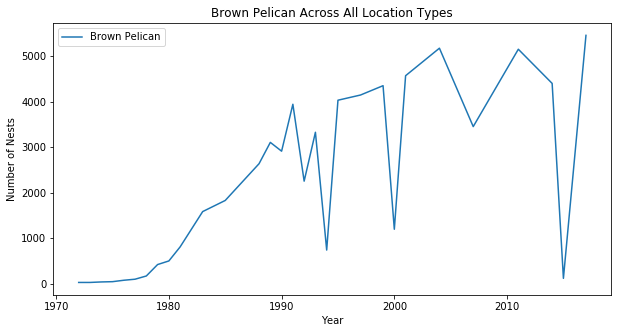

In [51]:
cwb_report('CWB report all sites.csv', birds = ["Brown Pelican"], return_table = False, show_plots = True)

## Example 2 - Comparisons

By default, this function will overlay species onto the same plot so they can easily be compared.

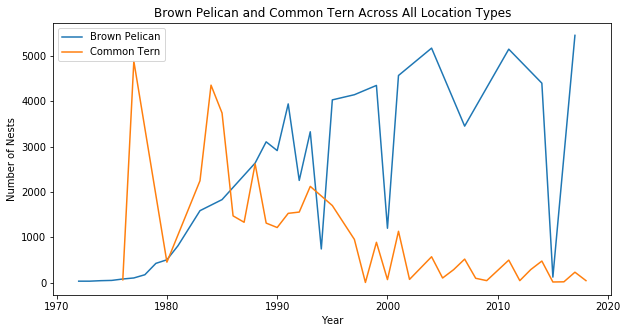

In [41]:
cwb_report('CWB report all sites.csv', birds = ["Brown Pelican", "Common Tern"], 
           return_table = False, show_plots = True)

However, maybe I don't want to overlay the species. I can put them on separate plots by setting "combine_plots" to False.

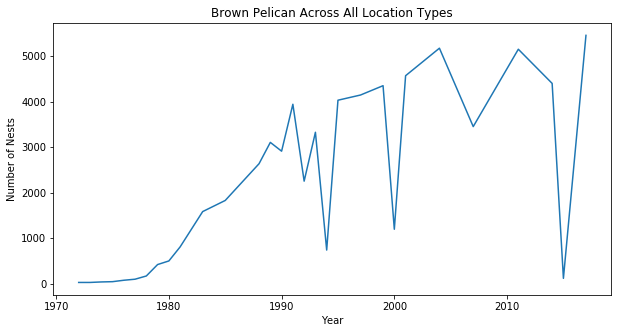

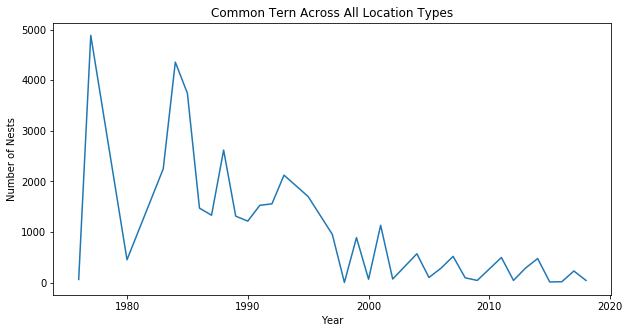

In [52]:
cwb_report('CWB report all sites.csv', birds = ["Brown Pelican", "Common Tern"], 
           return_table = False, show_plots = True, combine_plots = False)

I can look at a specific site too. Since I don't specify which birds to use, all birds present at that site are included.

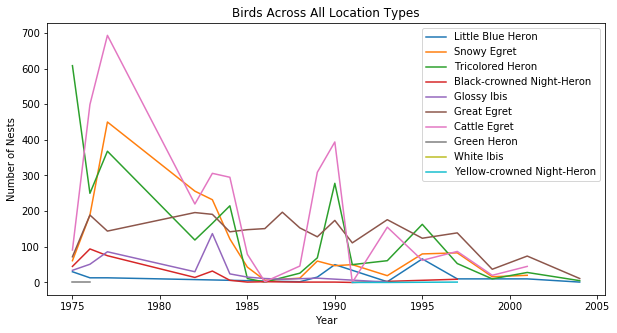

In [45]:
cwb_report('CWB report all sites.csv', sites = ['Battery Island, North'], 
           return_table = False, show_plots = True)

Maybe I don't want to see all those species. I can specify both the birds and the sites.

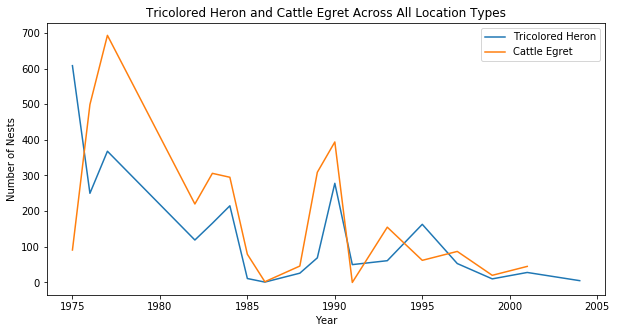

In [54]:
cwb_report('CWB report all sites.csv', birds = ["Cattle Egret", "Tricolored Heron"], sites = ['Battery Island, North'], 
           return_table = False, show_plots = True)

## Example 3
Here I want a summary of the nest count for every three years across all species. The group parameter will also give you the mean and the total count. 

In [26]:
cwb_report('CWB report all sites.csv', years=(1977,2018), skip_years=3, group = ['Species','Year'])

Year,1977,1980,1983,1986,1989,1992,1995,1998,2001,2004,2007,2010,2013,2016,mean,#
Species,,,,,,,,,,,,,,,,
American White Pelican,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0.357143,5
Anhinga,0,0,0,0,0,2,0,0,5,4,147,5,59,61,20.214286,283
Black Skimmer,1925,150,797,275,357,230,819,2,594,623,563,0,468,128,495.071429,6931
Black Tern,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0
Black-crowned Night-Heron,247,0,288,17,166,77,204,0,262,297,177,2,0,0,124.071429,1737
Brown Pelican,101,502,1586,0,3105,2254,4031,0,4569,5173,3452,0,0,0,1769.500000,24773
Caspian Tern,10,0,6,2,11,9,37,0,22,16,15,0,21,0,10.642857,149
Cattle Egret,1601,0,1448,108,1404,277,1517,0,342,547,1079,95,0,7,601.785714,8425
Common Tern,4885,450,2247,1471,1312,1555,1699,2,1131,569,517,0,287,16,1152.928571,16141
